"""
This is our oroject mainfile
"""

Modules of python
-----------------

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import randint

Modules with own classes
------------------------

In [74]:
from glassdata import GlassData
from network import NeuralNetwork

---------------------------------------
Data-set on rho and ANN on molar volume
---------------------------------------

In [75]:
# Dataset of rho
filedbrho='DataBase/rho20oxides.csv'
dbrho=GlassData(filedbrho)
dbrho.info()
dbrho.bounds()

**************
Finished loading dataset
Nb of samples: 64421
Nb of components: 20
**************
Finished loading dataset
Nb of samples: 64421
Nb of components: 20


In [76]:
# Determination of the molar volume
dbrho.oxidemolarmass()
dbrho.molarmass()
dbrho.y=dbrho.MolarM/dbrho.y
dbrho.normalize_y()

In [77]:
# Loading of the ANN model
arch=[20,20,20]
nnmolvol=NeuralNetwork(dbrho.noxide,arch,'gelu','linear')
nnmolvol.compile(3.e-4)
nnmolvol.ArchName(arch)
nnmolvol.load('Models/nnmolarvol'+nnmolvol.namearch+'.h5')
nnmolvol.info()

**************


Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_487 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_488 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_489 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_490 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

------------------------------------------------
Data-set on Young's modulus and ANN on Vt=E/(2G)
------------------------------------------------

In [78]:
filedbE='DataBase/E20oxides.csv'
dbE=GlassData(filedbE)
dbE.info()
dbE.bounds()

**************
Finished loading dataset
Nb of samples: 10846
Nb of components: 20
**************
Finished loading dataset
Nb of samples: 10846
Nb of components: 20


------------------------------
Loading of dissociation energy
------------------------------

In [79]:
datadisso=pd.read_csv('dissociationenergy.csv')
G=np.zeros(dbE.nsample)
for i in range(dbE.nsample):
    G[i]=np.sum(datadisso['G'].values*dbE.x[i,:])
#end for

In [80]:
# Determination of E/G and normalization
dbE.y=dbE.y/(2.*G)
dbE.normalize_y()

------------------------------
Loading of the ANN model on Vt
------------------------------

In [81]:
arch=[20,20,20]
nnmodelEsG=NeuralNetwork(dbE.noxide,arch,'gelu','linear')
nnmodelEsG.compile(1.e-4)
nnmodelEsG.ArchName(arch)
nnmodelEsG.load('Models/nnEsG'+nnmodelEsG.namearch+'.h5')
nnmodelEsG.info()

**************


Model: "sequential_262"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_986 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_987 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_988 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_989 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

---------------------------------------
Data-set on Tannealing=Tg and ANN model
---------------------------------------

In [82]:
# Data-set of Tannealing
filedbTannealing='DataBase/Tannealing20oxides.csv'
dbTannealing=GlassData(filedbTannealing)
dbTannealing.bounds()
dbTannealing.normalize_y()

**************
Finished loading dataset
Nb of samples: 6612
Nb of components: 20


In [83]:
# ANN model on Tannealing
# -----------------------
arch=[20,20,20]
nnTannealing=NeuralNetwork(dbTannealing.noxide,arch,'gelu','linear')
nnTannealing.compile(3.e-4)
nnTannealing.ArchName(arch)
nnTannealing.load('Models/nn'+dbTannealing.nameproperty+nnTannealing.namearch+'.h5')
nnTannealing.info()

**************


Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_585 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_586 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_587 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_588 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Data-set on Tmelt
-----------------

In [84]:
filedbTmelt='DataBase/Tmelt19oxides.csv'
dbTmelt=GlassData(filedbTmelt)
dbTmelt.info()
dbTmelt.bounds()
dbTmelt.normalize_y()

**************
Finished loading dataset
Nb of samples: 5996
Nb of components: 19
**************
Finished loading dataset
Nb of samples: 5996
Nb of components: 19


In [85]:
# ANN model on Tmelt
# ------------------
arch=[20,20,20]
nnTmelt=NeuralNetwork(dbTmelt.noxide,arch,'gelu','linear')
nnTmelt.compile(3.e-4)
nnTmelt.ArchName(arch)
nnTmelt.load('Models/nn'+dbTmelt.nameproperty+nnTmelt.namearch+'.h5')
nnTmelt.info()

**************


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 20)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,263 (4.94 KB)

 Trainable params: 1,261 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

------------------------------
Data-set on Tliq and ANN model
------------------------------

In [86]:
filedbTliq='DataBase\Tsoft20oxides.csv'
dbTliq=GlassData(filedbTliq)
dbTliq.info()
dbTliq.bounds()
dbTliq.normalize_y()

**************
Finished loading dataset
Nb of samples: 12531
Nb of components: 20
**************
Finished loading dataset
Nb of samples: 12531
Nb of components: 20


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\laure\AppData\Local\Temp\ipykernel_108564\4115716478.py:1: SyntaxWarning: invalid escape sequence '\T'
  filedbTliq='DataBase\Tsoft20oxides.csv'


In [87]:
# ANN model on Tliq
# -----------------
arch=[32,32,32,32]
nnTliq=NeuralNetwork(dbTliq.noxide,arch,'gelu','linear')
nnTliq.compile(3.e-4)
nnTliq.ArchName(arch)
#modelfile='Models\nn'+dbTliq.nameproperty+nnTliq.namearch+'.h5'
modelfile='Models/nnTsoft3c20.h5'
nnTliq.load(modelfile)
nnTliq.info()

**************


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_172 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

------------------------------------------
Determination of the bounds for each oxide
------------------------------------------

# Algo genetique

## Variables utiles

In [88]:
rho_db = pd.read_csv(r'DataBase\rho20oxides.csv', header=0)
E_db = pd.read_csv('DataBase\\E20oxides.csv', header=0)
Tg_db = pd.read_csv('DataBase\\Tannealing20oxides.csv', header=0)
Tm_db = pd.read_csv('DataBase\\Tmelt19oxides.csv', header=0)

prop_min = np.array([min(rho_db['rho']),min(E_db['E']),min(Tg_db['Tannealing']),min(Tm_db['Tmelt'])])
prop_max = np.array([max(rho_db['rho']),max(E_db['E']),max(Tg_db['Tannealing']),max(Tm_db['Tmelt'])])

print(prop_min,prop_max)

[1789.99996185   37.49200058  549.73444214  961.68375244] [7072.0000267   110.4        1190.15       2053.15061035]


In [ ]:
labels = dbrho.oxide
N_oxides = len(labels)
available_mat = ['SiO2', 'Al2O3', 'MgO', 'CaO', 'Na2O', 'K2O','ZnO', 'TiO2']
prop_label = ['rho','E','Tg','Tmelt']
columns = list(labels)+prop_label+['F']

#Contraintes
xmaxt=np.array([dbrho.xmax,dbE.xmax,dbTannealing.xmax,np.append(dbTmelt.xmax,1.),dbTliq.xmax])
xmax=np.zeros(dbrho.noxide)
for i in range(dbrho.noxide):
    if dbrho.oxide[i] in available_mat:
        xmax[i]=np.min(xmaxt[:,i])

xmin = np.zeros(dbrho.noxide)
xmin[list(dbrho.oxide).index('SiO2')] = 0.5
xmin[list(dbrho.oxide).index('Na2O')] = 0.1

#Parametres fitness function
#L'ordre des parametres est ['rho','E','Tg','Tmelt']
weight=[0,0.35,0,0.65]
minimize=[True,False,False,True]
penalties_onMin = [-np.inf, -np.inf, -np.inf, -np.inf]
penalties_onMax = [np.inf, np.inf, np.inf, np.inf]

N_generations = 60
N_population = 1000

survivor_rate = 0.1
parent_rate = 0.5
child_rate = 0.7
mutation_rate = 0
immigration_rate = 1 - survivor_rate - child_rate

strategies = ['2by2','tournament']
N_tournament = 5
child_strategy = strategies[1]

#population = np.zeros((N_population,len(labels) + len(prop_label) + 1))

N_parents = int(parent_rate * N_population)
N_childs = int(child_rate * N_population)
N_mutants = int(0.1 * N_population)

epsilon = 0.2

log_min_max = []

## Creation de generations

In [90]:
def prop_calculation(composition):
    global log_min_max
    rho=dbrho.GlassDensity(nnmolvol,dbrho.oxide,composition)
    E=dbE.YoungModulus(nnmodelEsG,datadisso,dbE.oxide,composition)
    Tg=dbTannealing.physicaly(nnTannealing.model.predict(composition).transpose()[0,:])
    Tmelt=dbTmelt.physicaly(nnTmelt.model.predict(composition[:,:-1]).transpose()[0,:])
    log_min_max.append([np.min(E),np.max(E),np.min(Tmelt),np.max(Tmelt)])
    return np.vstack((rho,E,Tg,Tmelt)).transpose()

In [91]:
def normalize(prop):
    #return (prop - prop.min(axis=0))/(prop.max(axis=0)-prop.min(axis=0))
    return (prop - prop_min)/(prop_max - prop_min)

In [92]:
penalties_onMin_normalized = normalize(penalties_onMin)
penalties_onMax_normalized = normalize(penalties_onMax)

In [93]:
def fitness(property_normalized):
    rating = 0
    #print(penalties_onMin_normalized, property_normalized, penalties_onMax_normalized)
    #print(np.all(penalties_onMin_normalized <= property_normalized) and np.all(penalties_onMax_normalized >= property_normalized))
    if np.all(penalties_onMin_normalized <= property_normalized) and np.all(penalties_onMax_normalized >= property_normalized):
        for i in range(len(weight)):
            if minimize[i]:
                rating += (1-property_normalized[i])*weight[i]
            else:
                rating += property_normalized[i]*weight[i]
    return rating

In [94]:
#prop est une array avec les proprietes du verre normalisées, weight est le poids qu'on accorde
#à chacune des proprietes, et minize est une liste de booléens selon qu'on veuille minimiser
#ou maximiser une certaine variable
'''def fitness_func(prop_normalized,weight,minimize):
    rating = np.zeros(prop_normalized.shape[0])
    for i in range(len(weight)):
        if minimize[i]:
            rating += (1-prop_normalized[:,i])*weight[i]
        else:
            rating += prop_normalized[:,i]*weight[i]
    return rating'''
def fitness_func(prop_normalized):
    return np.apply_along_axis(fitness,1,prop_normalized)

In [95]:
# Trie la population par F decroissant et renvoie cette population triée avec une nuovelle colonne qui represente 
# le fitness de chaque composition.
def stack_by_f(population,properties,F):
    population_info = np.column_stack((population,properties,F))
    sorted_arr = population_info[population_info[:, -1].argsort()][::-1]
    return sorted_arr

In [96]:
def init_properties(population):
    prop = prop_calculation(population)
    normalized_prop = normalize(prop)
    F = fitness_func(normalized_prop)
    #print(F)
    sorted_arr = stack_by_f(population, prop, F)
    return sorted_arr

In [97]:
def compute_properties(generation):
    population_sorted = init_properties(generation[:, :20])
    return population_sorted

In [98]:
def init_pop(N_population):
    population,_=dbrho.better_random_composition(N_population,xmin,xmax)
    population = init_properties(population)
    return population

In [ ]:
def parent_choice (parents,strategie) :
    if strategie =='2by2' and N_parents>= 2*N_childs:
        dads = parents[::2]
        moms = parents[1::2]
        return (np.array(moms[:N_childs]),np.array(dads[:N_childs]))    
    if strategie =='tournament':
        dads =[]
        moms =[]
        for i in range(N_childs):
            t = np.array([parents[i,:] for i in np.random.choice(N_parents,N_childs)])
            dad = t[np.argmax(t[:N_tournament,-1])]
            mom = t[np.argmax(t[N_tournament:,-1])]
            dads.append(dad)
            moms.append(mom)
        return (np.array(moms),np.array(dads))
    #Fallback
    t = np.array([parents[i] for i in np.random.choice(N_parents,N_childs*2)])
    return (np.array(t[N_childs:]),np.array(t[:N_childs]))

In [100]:
def population_selection(generation):
    survivors = generation[:int(N_population*survivor_rate)]
    dads,moms = parent_choice(generation[:N_parents],child_strategy)
    #to_be_mutated = sorted_population[int(N_population*survivor_rate):int(N_population*survivor_rate)+int(N_population*mutation_rate)]
    return survivors,dads,moms 

In [101]:
'''def crossover (parents) :
    #Dans parents chaque individu est représenté par 20 premiers floats et le dernier est la valeur de fitness
    childs = np.array([[0.] * len(parents[0])] * N_childs)
    for i in range (N_childs) :
        i1 = randint(0, N_parents-1)
        i2 = randint(0, N_parents-2)
        if i2 == i1 : #problème si deux fois le même parent !!
            i2 += 1
        w1 = parents[i1, -1] / (parents[i1, -1] + parents[i2, -1]) #poids du parent 1
        w2 = parents[i2, -1] / (parents[i1, -1] + parents[i2, -1]) #poids du parent 2
        childs[i] = (w1 * parents[i1] + w2 * parents[i2]) #moyenne pondérée
    return (childs)'''

'def crossover (parents) :\n    #Dans parents chaque individu est représenté par 20 premiers floats et le dernier est la valeur de fitness\n    childs = np.array([[0.] * len(parents[0])] * N_childs)\n    for i in range (N_childs) :\n        i1 = randint(0, N_parents-1)\n        i2 = randint(0, N_parents-2)\n        if i2 == i1 : #problème si deux fois le même parent !!\n            i2 += 1\n        w1 = parents[i1, -1] / (parents[i1, -1] + parents[i2, -1]) #poids du parent 1\n        w2 = parents[i2, -1] / (parents[i1, -1] + parents[i2, -1]) #poids du parent 2\n        childs[i] = (w1 * parents[i1] + w2 * parents[i2]) #moyenne pondérée\n    return (childs)'

In [102]:
# températures de fusion des oxydes (en °C) : 
# [1610, 2045, 2852, 2580]
# dureté des oxydes :
# [7, 9, 5.5]
# TiO2 est un agent nucléant utilisé pour les plaques vitrocéramiques (très faible coeff de dilatation thermique).
# source : L'élémentarium

# fondants = ['Na2O', 'K2O', 'MgO']
# stabilisants = ['CaO', 'ZnO']
# ZnO augmente l'élasticité
# source : https://lasirene.e-monsite.com/pages/le-verre/-.html

# formateurs = ['SiO2']
# SiO2 augmente la dureté du verre
# fondants = ['Na2O', 'K2O', 'MgO']
# stabilisants = ['CaO', 'ZnO']
# source : https://infovitrail.com/contenu.php/fr/d/---la-composition-du-verre/e9b609c9-91f5-4a08-86a6-6112dc12b66d

# fondants = ['Na2O', 'K2O'] + ['CaO', 'MgO'] (mais moins bien que les deux premiers)
# modificateurs = ['CaO', 'MgO', 'Al2O3'] #augmentent les propriétés de durabilité chimique et mécanique (E ??)
# formateurs = ['SiO2'] #essentiels
# source : Franck

fondants = [False, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] # diminuent Tm
durability = [True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] #augmentent E
other = [False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]

def crossover (mom, dad) :
    childs = np.zeros((len(mom), len(mom[0])))
    for i in range (N_childs) :
        if mom[i, 21] < dad[i, 21] : #choix du meilleur E
            bestE = dad[i]
        else :
            bestE = mom[i]
        if mom[i, 23] < dad[i, 23] : #choix du meilleur Tm
            bestTm = mom[i]
        else :
            bestTm = dad[i]
        childs[i][fondants] = bestTm[fondants]
        childs[i][durability] = bestE[durability]
        childs[i][other] = (mom[i][other] + dad[i][other])/2
        sum = np.sum(childs[i,1:])
        childs[i,1:] = (1-childs[i,0]) * childs[i,1:] / sum
    return (childs)

'''def crossover (mom, dad) :
    childs = np.zeros((len(mom), len(mom[0])))
    for i in range (N_childs) :
        wMomTm = mom[i, 23] / (mom[i, 23] + dad[i, 23])
        wDadTm = dad[i, 23] / (mom[i, 23] + dad[i, 23])
        wMomE = mom[i, 21] / (mom[i, 21] + dad[i, 21])
        wDadE = dad[i, 21] / (mom[i, 21] + dad[i, 21])
        childs[i][fondants] = wMomTm * mom[i][fondants] + wDadTm * dad[i][fondants]
        childs[i][durability] = wMomE * mom[i][durability] + wDadE * dad[i][durability]
        childs[i][other] = (mom[i][other] + dad[i][other])/2
    return (childs)'''

'def crossover (mom, dad) :\n    childs = np.zeros((len(mom), len(mom[0])))\n    for i in range (N_childs) :\n        wMomTm = mom[i, 23] / (mom[i, 23] + dad[i, 23])\n        wDadTm = dad[i, 23] / (mom[i, 23] + dad[i, 23])\n        wMomE = mom[i, 21] / (mom[i, 21] + dad[i, 21])\n        wDadE = dad[i, 21] / (mom[i, 21] + dad[i, 21])\n        childs[i][fondants] = wMomTm * mom[i][fondants] + wDadTm * dad[i][fondants]\n        childs[i][durability] = wMomE * mom[i][durability] + wDadE * dad[i][durability]\n        childs[i][other] = (mom[i][other] + dad[i][other])/2\n    return (childs)'

In [103]:
def mutation (mutants) :
    #les mutants sont les meilleures compositions entre 40% et 50%
    for j in range (N_mutants) :
        iplus = randint(0, 19) #choix de l'oxyde qui gagne epsilon
        imoins = randint(0, 19) #choix de l'oxyde qui perd epsilon
        if imoins == iplus : #problème si deux fois le même oxyde !!
            imoins = (1 + imoins)%19
        mutantPlus = mutants[j, iplus]
        mutantMoins = mutants[j, imoins]
        if (mutantMoins > epsilon + xmin[j]) and (mutantPlus < xmax[j] - epsilon) :
            mutants[j, iplus] = mutantPlus + epsilon
            mutants[j, imoins] = mutantMoins - epsilon
    return (mutants)

def bettermutation (mutants) :
    
    for j in range (N_mutants) :
        travel = np.random.rand(20) - 0.5
        travel =travel/np.linalg.norm(travel)*epsilon
        mutants[j,:20] += travel
        for _ in range(5):
            mutants[j,:20] = np.clip(mutants[j,:20],xmin*np.sum(mutants[j,:20]),xmax*np.sum(mutants[j,:20]))
            mutants[j,:20] = mutants[j,:20]/np.sum(mutants[j,:20])
    return (mutants)

In [104]:
def new_generation(old_generation):
    survivors,dads,moms = population_selection(old_generation)
    child = bettermutation(crossover(dads,moms))
    immigrants = init_pop(N_population - (len(survivors) + len(child)))
    new_population = np.vstack((np.vstack((survivors,child)),immigrants))
    new_population = compute_properties(new_population)
    return new_population

In [105]:
def evolution(generation,N,graphe = True):
    global log_min_max
    convergence_graph = []
    for _ in range(N):
        generation = new_generation(generation)
        fit_score = np.mean(generation[:10],axis = 0)[-1]
        convergence_graph.append(fit_score)
    if graphe:
        log_min_max = np.array(log_min_max)
        plt.plot(np.arange(N),convergence_graph)
        plt.title('evolution of the generational fitness')
        plt.show()
        plt.plot(np.arange(len(log_min_max[::2,3])),log_min_max[::2,2],'r')
        plt.plot(np.arange(len(log_min_max[::2,3])),log_min_max[::2,3],'g')
        plt.title('evolution of the generational fitness')
        
    return generation

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
32/32 ━━━━━━━━━━━

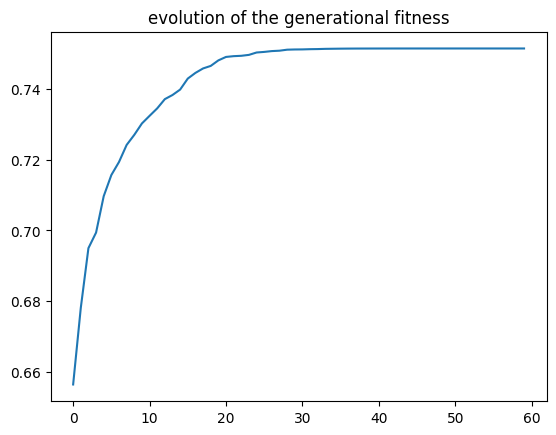

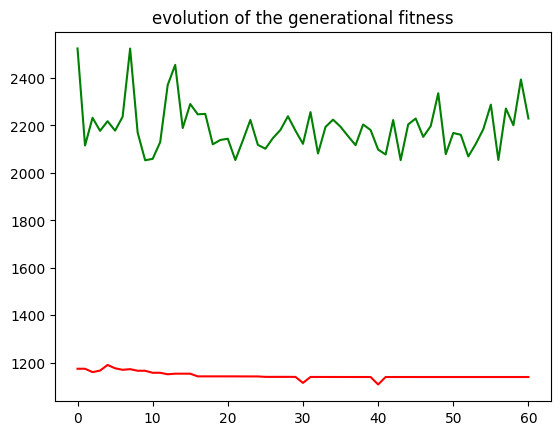

In [106]:
initial_pop = init_pop(N_population)
compositions = evolution(initial_pop,N_generations)

In [107]:
df = pd.DataFrame(compositions,columns=columns)
#df.to_csv('generation_final_oui_le_bon_fin_presque.csv')
df
#df.to_csv('generation_final_29_11b.csv')

,SiO2,B2O3,Al2O3,MgO,CaO,BaO,Li2O,Na2O,K2O,ZnO,...,TiO2,GeO2,ZrO2,P2O5,V2O5,rho,E,Tg,Tmelt,F
0,0.498779,0.0,0.000000e+00,0.000000e+00,7.140744e-04,0.0,0.0,0.218413,0.000000,1.030536e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729396,80.737027,728.093773,1140.132303,0.751330
1,0.498779,0.0,0.000000e+00,0.000000e+00,7.140742e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729553,80.737018,728.093922,1140.132243,0.751330
2,0.498779,0.0,0.000000e+00,0.000000e+00,7.140743e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729550,80.737018,728.093922,1140.132243,0.751330
3,0.498779,0.0,0.000000e+00,0.000000e+00,7.140743e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729550,80.737018,728.093922,1140.132243,0.751330
4,0.498779,0.0,0.000000e+00,0.000000e+00,7.140742e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729879,80.737002,728.093922,1140.132123,0.751330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.865342,0.0,6.223767e-04,5.041276e-05,4.397143e-15,0.0,0.0,0.100170,0.030940,2.865244e-03,...,9.741188e-06,0.0,0.0,0.0,0.0,2347.500713,62.131765,783.648529,1946.924682,0.181546
996,0.823112,0.0,2.383955e-13,2.693035e-02,5.602981e-08,0.0,0.0,0.100000,0.002148,2.542446e-02,...,2.238575e-02,0.0,0.0,0.0,0.0,2422.439762,69.135591,855.746046,2029.667650,0.165892
997,0.575678,0.0,2.072190e-01,4.299486e-05,2.417430e-04,0.0,0.0,0.150566,0.066252,2.741911e-07,...,2.123808e-16,0.0,0.0,0.0,0.0,2473.780771,71.740565,1039.052298,2058.337360,0.161324
998,0.884153,0.0,3.692628e-05,4.571633e-03,8.392233e-06,0.0,0.0,0.100435,0.010795,3.168672e-16,...,2.996663e-12,0.0,0.0,0.0,0.0,2322.179989,63.364804,866.675028,2053.713836,0.123869


In [108]:
df

,SiO2,B2O3,Al2O3,MgO,CaO,BaO,Li2O,Na2O,K2O,ZnO,...,TiO2,GeO2,ZrO2,P2O5,V2O5,rho,E,Tg,Tmelt,F
0,0.498779,0.0,0.000000e+00,0.000000e+00,7.140744e-04,0.0,0.0,0.218413,0.000000,1.030536e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729396,80.737027,728.093773,1140.132303,0.751330
1,0.498779,0.0,0.000000e+00,0.000000e+00,7.140742e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729553,80.737018,728.093922,1140.132243,0.751330
2,0.498779,0.0,0.000000e+00,0.000000e+00,7.140743e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729550,80.737018,728.093922,1140.132243,0.751330
3,0.498779,0.0,0.000000e+00,0.000000e+00,7.140743e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729550,80.737018,728.093922,1140.132243,0.751330
4,0.498779,0.0,0.000000e+00,0.000000e+00,7.140742e-04,0.0,0.0,0.218413,0.000000,1.030537e-01,...,1.790405e-01,0.0,0.0,0.0,0.0,2913.729879,80.737002,728.093922,1140.132123,0.751330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.865342,0.0,6.223767e-04,5.041276e-05,4.397143e-15,0.0,0.0,0.100170,0.030940,2.865244e-03,...,9.741188e-06,0.0,0.0,0.0,0.0,2347.500713,62.131765,783.648529,1946.924682,0.181546
996,0.823112,0.0,2.383955e-13,2.693035e-02,5.602981e-08,0.0,0.0,0.100000,0.002148,2.542446e-02,...,2.238575e-02,0.0,0.0,0.0,0.0,2422.439762,69.135591,855.746046,2029.667650,0.165892
997,0.575678,0.0,2.072190e-01,4.299486e-05,2.417430e-04,0.0,0.0,0.150566,0.066252,2.741911e-07,...,2.123808e-16,0.0,0.0,0.0,0.0,2473.780771,71.740565,1039.052298,2058.337360,0.161324
998,0.884153,0.0,3.692628e-05,4.571633e-03,8.392233e-06,0.0,0.0,0.100435,0.010795,3.168672e-16,...,2.996663e-12,0.0,0.0,0.0,0.0,2322.179989,63.364804,866.675028,2053.713836,0.123869
